In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2022-01-20"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2022_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-01-20   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
1   2022-01-20     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5720     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2022-01-20     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   6500     Î∂ÅÍµ¨  18500     Î∂ÅÍµ¨   
3   2022-01-20     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3500     Î∂ÅÍµ¨   3990     Î∂ÅÍµ¨   
4   2022-01-20    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6650     Î∂ÅÍµ¨   8980     Î∂ÅÍµ¨   
5   2022-01-20     ÎåÄÌåå                      1.0„éè   1980     Î∂ÅÍµ¨   3140     Î∂ÅÍµ¨   
6   2022-01-20   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11400     Î∂ÅÍµ¨  12400     Î∂ÅÍµ¨   
7   2022-01-20     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   5194     Î∂ÅÍµ¨   
8   2022-01-20     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     Î∂ÅÍµ¨    740     Î∂ÅÍµ¨   
9   2022-01-20     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1440     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
10  2022-01-20      Î¨¥                   2.0„éè 1Í∞ú   1280     Î∂ÅÍµ¨   1752     Î∂ÅÍµ¨   
11  2022-01-20    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3880     Î∂ÅÍµ¨   4090     Î∂ÅÍµ¨   
12  2022-01-20     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2980     Î∂ÅÍµ¨   3330     Î∂ÅÍµ¨   
13  2022-01-20      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  20000     Î∂ÅÍµ¨  44700     Î∂ÅÍµ¨   
14  2022-01-20     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3834     Î∂ÅÍµ¨   4500     Î∂ÅÍµ¨   
15  2022-01-20  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   6930     Î∂ÅÍµ¨   
16  2022-01-20   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850     Î∂ÅÍµ¨  14980     Î∂ÅÍµ¨   
17  2022-01-20     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19191     Î∂ÅÍµ¨  20000     Î∂ÅÍµ¨   
18  2022-01-20    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2566     Î∂ÅÍµ¨   2580     Î∂ÅÍµ¨   
19  2022-01-20     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780     Î∂ÅÍµ¨   1780     Î∂ÅÍµ¨   
20  2022-01-20     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1280     Î∂ÅÍµ¨   1300     Î∂ÅÍµ¨   
21  2022-01-20    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  59000     Î∂ÅÍµ¨  59000     Î∂ÅÍµ¨   
22  2022-01-20    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5480     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
23  2022-01-20      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  48900     Î∂ÅÍµ¨  50900     Î∂ÅÍµ¨   
24  2022-01-20     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2000     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
25  2022-01-20    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6980     Î∂ÅÍµ¨   7012     Î∂ÅÍµ¨   
26  2022-01-20     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    800     Î∂ÅÍµ¨    873     Î∂ÅÍµ¨   
27  2022-01-20    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7190     Î∂ÅÍµ¨   7580     Î∂ÅÍµ¨   
28  2022-01-20   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500     Î∂ÅÍµ¨   2730     Î∂ÅÍµ¨   
29  2022-01-20     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2850     Î∂ÅÍµ¨   3650     Î∂ÅÍµ¨   
30  2022-01-20    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12530     Î∂ÅÍµ¨  14500     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    2225   33.33%   7,788  
1    1260   22.03%   6,350  
2   12000  184.62%  12,500  
3     490    14.0%   3,745  
4    2330   35.04%   7,815  
5    1160   58.59%   2,560  
6    1000    8.77%  11,900  
7    3694  246.27%   3,347  
8       4    0.54%     738  
9      20    1.39%   1,450  
10    472   36.88%   1,516  
11    210    5.41%   3,985  
12    350   11.74%   3,155  
13  24700   123.5%  32,350  
14    666   17.37%   4,167  
15   2940   73.68%   5,460  
16   1130    8.16%  14,415  
17    809    4.22%  19,596  
18     14    0.55%   2,573  
19      0     0.0%   1,780  
20     20    1.56%   1,290  
21      

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2022-04-21"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2022_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-04-21   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
1   2022-04-21     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5720     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2022-04-21     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   7000     Î∂ÅÍµ¨  15409     Î∂ÅÍµ¨   
3   2022-04-21    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4500     Î∂ÅÍµ¨   5000     Î∂ÅÍµ¨   
4   2022-04-21     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3800     Î∂ÅÍµ¨   3990     Î∂ÅÍµ¨   
5   2022-04-21    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6980     Î∂ÅÍµ¨   8316     Î∂ÅÍµ¨   
6   2022-04-21     ÎåÄÌåå                      1.0„éè   1980     Î∂ÅÍµ¨   2490     Î∂ÅÍµ¨   
7   2022-04-21   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8900     Î∂ÅÍµ¨  12900     Î∂ÅÍµ¨   
8   2022-04-21     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   5194     Î∂ÅÍµ¨   
9   2022-04-21     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     Î∂ÅÍµ¨    740     Î∂ÅÍµ¨   
10  2022-04-21     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2022-04-21      Î¨¥                   2.0„éè 1Í∞ú   1580     Î∂ÅÍµ¨   1635     Î∂ÅÍµ¨   
12  2022-04-21    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3880     Î∂ÅÍµ¨   3890     Î∂ÅÍµ¨   
13  2022-04-21      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  25000     Î∂ÅÍµ¨  39816     Î∂ÅÍµ¨   
14  2022-04-21     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4300     Î∂ÅÍµ¨   4980     Î∂ÅÍµ¨   
15  2022-04-21  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   7699     Î∂ÅÍµ¨   
16  2022-04-21   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14900     Î∂ÅÍµ¨  14980     Î∂ÅÍµ¨   
17  2022-04-21     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  16000     Î∂ÅÍµ¨  24519     Î∂ÅÍµ¨   
18  2022-04-21    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816     Î∂ÅÍµ¨   2880     Î∂ÅÍµ¨   
19  2022-04-21     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780     Î∂ÅÍµ¨   1780     Î∂ÅÍµ¨   
20  2022-04-21     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
21  2022-04-21    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  57000     Î∂ÅÍµ¨  59000     Î∂ÅÍµ¨   
22  2022-04-21    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5490     Î∂ÅÍµ¨   8060     Î∂ÅÍµ¨   
23  2022-04-21      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900     Î∂ÅÍµ¨  49900     Î∂ÅÍµ¨   
24  2022-04-21     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2200     Î∂ÅÍµ¨   3380     Î∂ÅÍµ¨   
25  2022-04-21     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    800     Î∂ÅÍµ¨    873     Î∂ÅÍµ¨   
26  2022-04-21    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6990     Î∂ÅÍµ¨   7580     Î∂ÅÍµ¨   
27  2022-04-21   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500     Î∂ÅÍµ¨   2730     Î∂ÅÍµ¨   
28  2022-04-21     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2850     Î∂ÅÍµ¨   3650     Î∂ÅÍµ¨   
29  2022-04-21    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  10150     Î∂ÅÍµ¨  14500     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1475   19.87%   8,163  
1    1260   22.03%   6,350  
2    8409  120.13%  11,205  
3     500   11.11%   4,750  
4     190     5.0%   3,895  
5    1336   19.14%   7,648  
6     510   25.76%   2,235  
7    4000   44.94%  10,900  
8    3694  246.27%   3,347  
9       4    0.54%     738  
10     30    1.94%   1,565  
11     55    3.48%   1,608  
12     10    0.26%   3,885  
13  14816   59.26%  32,408  
14    680   15.81%   4,640  
15   3709   92.96%   5,845  
16     80    0.54%  14,940  
17   8519   53.24%  20,260  
18     64    2.27%   2,848  
19      0     0.0%   1,780  
20     10    0.72%   1,385  
21   2000    3.51%  58,000  
22   2570   46.81%   6,775  
23      0     0.0%  49,900  
24   1180   53.64%  

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2022-07-21"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2022_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-07-21   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8925     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2022-07-21     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2022-07-21     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   6000     Î∂ÅÍµ¨  12571     Î∂ÅÍµ¨   
3   2022-07-21    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4975     Î∂ÅÍµ¨   5000     Î∂ÅÍµ¨   
4   2022-07-21     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990     Î∂ÅÍµ¨   4100     Î∂ÅÍµ¨   
5   2022-07-21    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5816     Î∂ÅÍµ¨   8600     Î∂ÅÍµ¨   
6   2022-07-21     ÎåÄÌåå                      1.0„éè   3480     Î∂ÅÍµ¨   3740     Î∂ÅÍµ¨   
7   2022-07-21   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13900     Î∂ÅÍµ¨  13900     Î∂ÅÍµ¨   
8   2022-07-21     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   4509     Î∂ÅÍµ¨   
9   2022-07-21     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     Î∂ÅÍµ¨    740     Î∂ÅÍµ¨   
10  2022-07-21     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2022-07-21      Î¨¥                   2.0„éè 1Í∞ú   2190     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
12  2022-07-21    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2022-07-21     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9970     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
14  2022-07-21      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  20000     Î∂ÅÍµ¨  44824     Î∂ÅÍµ¨   
15  2022-07-21     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5233     Î∂ÅÍµ¨   6880     Î∂ÅÍµ¨   
16  2022-07-21  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   8477     Î∂ÅÍµ¨   
17  2022-07-21   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14900     Î∂ÅÍµ¨  14970     Î∂ÅÍµ¨   
18  2022-07-21     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19833     Î∂ÅÍµ¨  20000     Î∂ÅÍµ¨   
19  2022-07-21    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816     Î∂ÅÍµ¨   3480     Î∂ÅÍµ¨   
20  2022-07-21     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     Î∂ÅÍµ¨   1980     Î∂ÅÍµ¨   
21  2022-07-21     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
22  2022-07-21    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  54000     Î∂ÅÍµ¨  59000     Î∂ÅÍµ¨   
23  2022-07-21    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7680     Î∂ÅÍµ¨   7980     Î∂ÅÍµ¨   
24  2022-07-21      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  43900     Î∂ÅÍµ¨  49900     Î∂ÅÍµ¨   
25  2022-07-21     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2700     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
26  2022-07-21    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6964     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
27  2022-07-21     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    800     Î∂ÅÍµ¨    873     Î∂ÅÍµ¨   
28  2022-07-21    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6990     Î∂ÅÍµ¨   7580     Î∂ÅÍµ¨   
29  2022-07-21   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   2870     Î∂ÅÍµ¨   
30  2022-07-21     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980     Î∂ÅÍµ¨   3730     Î∂ÅÍµ¨   
31  2022-07-21    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12697     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1975   22.13%   9,913  
1    1780   34.23%   6,090  
2    6571  109.52%   9,286  
3      25     0.5%   4,988  
4     110    2.76%   4,045  
5    2784   47.87%   7,208  
6     260    7.47%   3,610  
7       0     0.0%  13,900  
8    3009   200.6%   3,005  
9       4    0.54%     738  
10     30    1.94%   1,565  
11    790   36.07%   2,585  
12    150    3.26%   4,675  
13    930    9.33%  10,435  
14  24824  124.12%  32,412  
15   1647   31.47%   6,057  
16   4487  112.46%   6,234  
17     70    0.47%  1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2022-10-20"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2022_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-10-20   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8925     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2022-10-20     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2022-10-20     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   6500     Î∂ÅÍµ¨  16500     Î∂ÅÍµ¨   
3   2022-10-20    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5000     Î∂ÅÍµ¨   5725     Î∂ÅÍµ¨   
4   2022-10-20     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3900     Î∂ÅÍµ¨   4193     Î∂ÅÍµ¨   
5   2022-10-20    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8733     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
6   2022-10-20     ÎåÄÌåå                      1.0„éè   2900     Î∂ÅÍµ¨   3620     Î∂ÅÍµ¨   
7   2022-10-20   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12400     Î∂ÅÍµ¨  14900     Î∂ÅÍµ¨   
8   2022-10-20     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   4498     Î∂ÅÍµ¨   
9   2022-10-20     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820     Î∂ÅÍµ¨    820     Î∂ÅÍµ¨   
10  2022-10-20     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2022-10-20      Î¨¥                   2.0„éè 1Í∞ú   3200     Î∂ÅÍµ¨   4900     Î∂ÅÍµ¨   
12  2022-10-20    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2022-10-20     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3480     Î∂ÅÍµ¨   5980     Î∂ÅÍµ¨   
14  2022-10-20      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19980     Î∂ÅÍµ¨  28000     Î∂ÅÍµ¨   
15  2022-10-20     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5600     Î∂ÅÍµ¨   5684     Î∂ÅÍµ¨   
16  2022-10-20  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   7699     Î∂ÅÍµ¨   
17  2022-10-20   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14970     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   
18  2022-10-20     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  20000     Î∂ÅÍµ¨  24975     Î∂ÅÍµ¨   
19  2022-10-20    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816     Î∂ÅÍµ¨   3480     Î∂ÅÍµ¨   
20  2022-10-20     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     Î∂ÅÍµ¨   1980     Î∂ÅÍµ¨   
21  2022-10-20     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
22  2022-10-20    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  58000     Î∂ÅÍµ¨  59000     Î∂ÅÍµ¨   
23  2022-10-20    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8280     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
24  2022-10-20      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  36800     Î∂ÅÍµ¨  47900     Î∂ÅÍµ¨   
25  2022-10-20     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3000     Î∂ÅÍµ¨   4500     Î∂ÅÍµ¨   
26  2022-10-20     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    800     Î∂ÅÍµ¨    873     Î∂ÅÍµ¨   
27  2022-10-20    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6700     Î∂ÅÍµ¨   7580     Î∂ÅÍµ¨   
28  2022-10-20   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   2730     Î∂ÅÍµ¨   
29  2022-10-20     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3680     Î∂ÅÍµ¨   3730     Î∂ÅÍµ¨   
30  2022-10-20    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1975   22.13%   9,913  
1    1780   34.23%   6,090  
2   10000  153.85%  11,500  
3     725    14.5%   5,363  
4     293    7.51%   4,047  
5     167    1.91%   8,817  
6     720   24.83%   3,260  
7    2500   20.16%  13,650  
8    2998  199.87%   2,999  
9       0     0.0%     820  
10     30    1.94%   1,565  
11   1700   53.12%   4,050  
12    150    3.26%   4,675  
13   2500   71.84%   4,730  
14   8020   40.14%  23,990  
15     84     1.5%   5,642  
16   3709   92.96%   5,845  
17    930    6.21%  15,435  
18   4975   24.88%  22,488  
19    664   23.58%   3,148  
20      0     0.0%   1,980  
21     10 

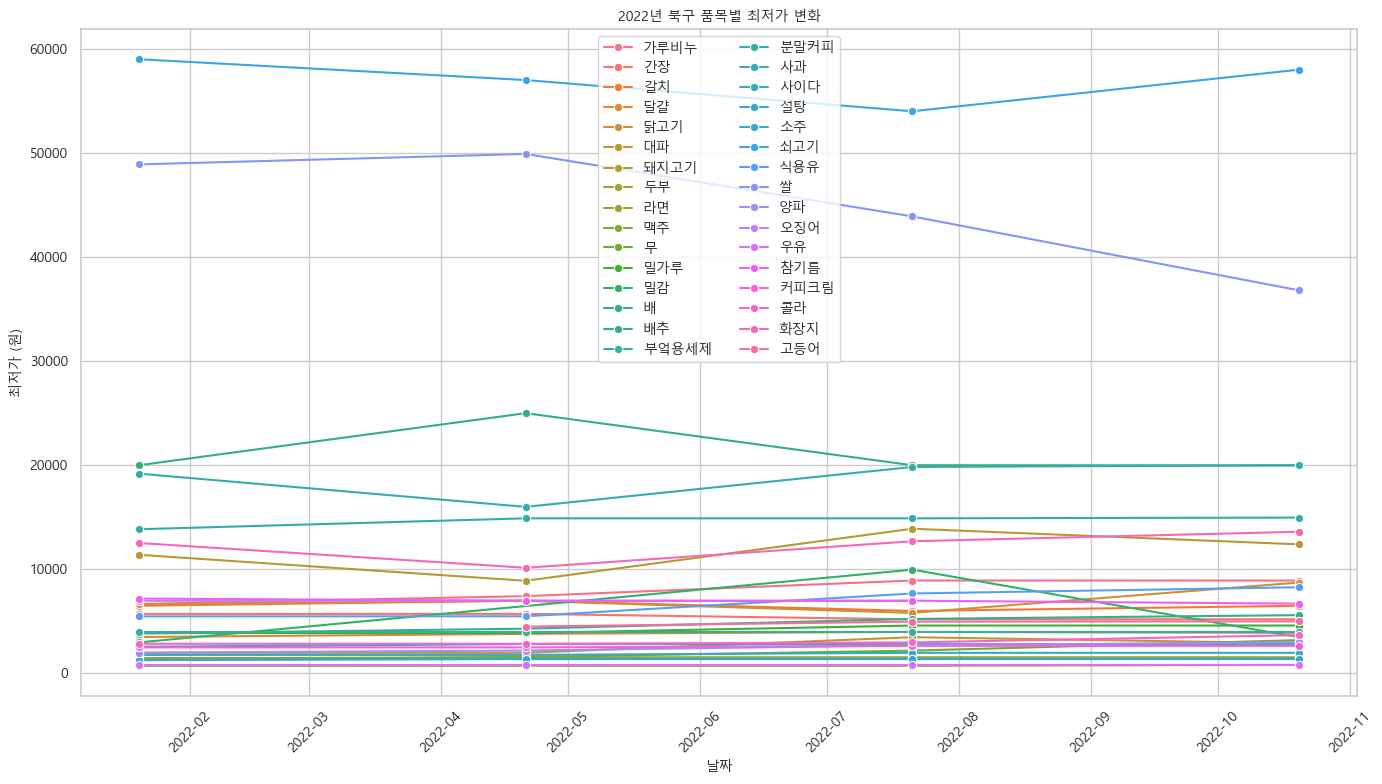

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2022_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2022_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2022_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2022_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2022ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2022_min.csv", index=False, encoding="utf-8-sig")

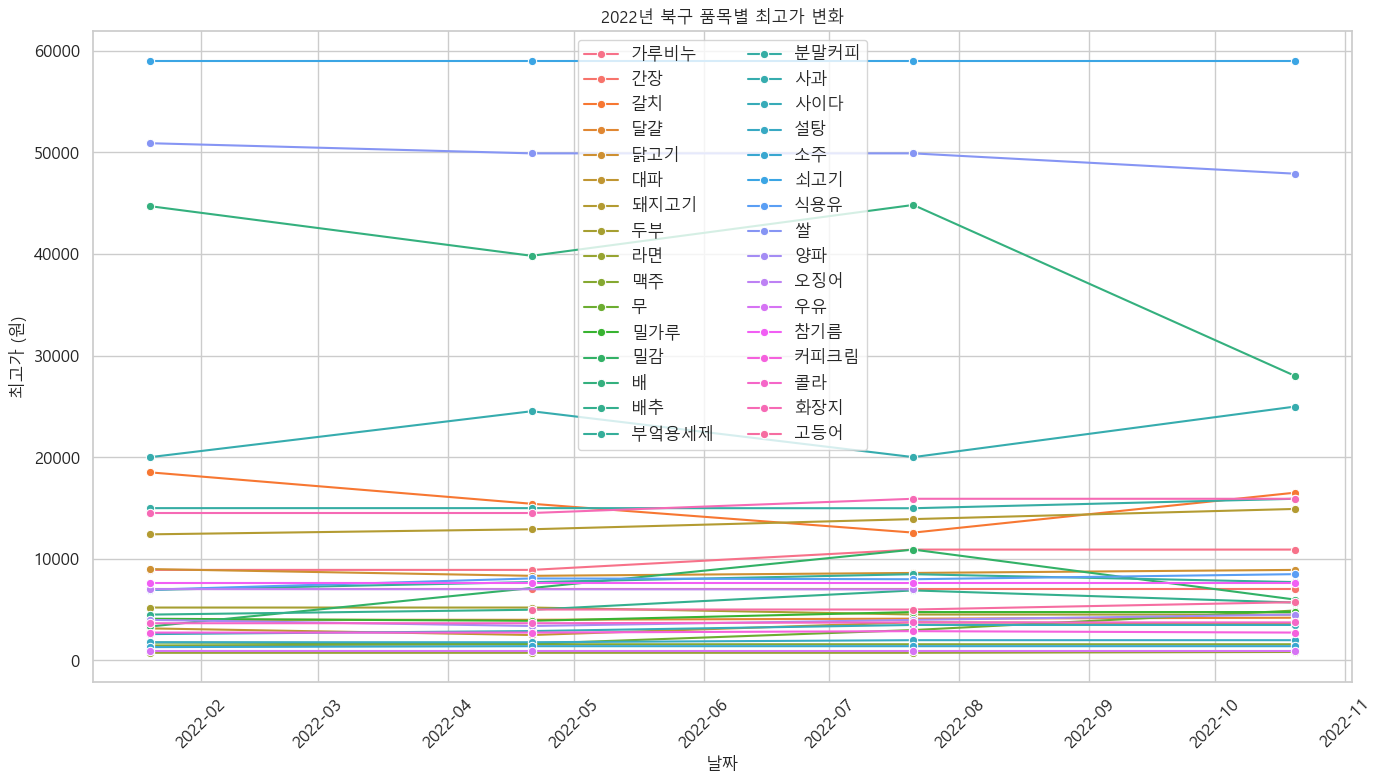

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2022_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2022_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2022_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2022_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2022ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2022_max.csv", index=False, encoding="utf-8-sig")